In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os, copy
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import time
import math, tqdm
import seaborn as sns
from lib.train import Train
from lib.evaluation import plot_train_val_multiple, plot_train_val
import seaborn as sns
import pandas as pd
from lib.experiment import SYNTHETIC_EXPERIMENTS
import os
from lib.model import MODELS
from lib.train import TrainMORNN
from MTL_OPT.lib.evaluation import plot_best, plot_best_test
torch.set_num_threads(1)

# MIMIC3

RNN_ILSTM test: 0.836 val: -0.848 fn:mimic3/train_loss/RNN_ILSTM-0.001-0.3-32-1-100^-1.00^B2LNV.train_losses
RNN_LSTM_MoO test: 0.849 val: -0.858 fn:mimic3/train_loss/RNN_LSTM_MoO-0.001-0.3-32-2-100^-1.00^1WNT9.train_losses
RNN_LSTM test: 0.857 val: -0.855 fn:mimic3/train_loss/RNN_LSTM-0.001-0.3-64-2-100^-1.00^TSVPB.train_losses
RNN_LSTM_MoW test: 0.856 val: -0.859 fn:mimic3/train_loss/RNN_LSTM_MoW-0.001-0.3-32-1-100^-1.00^B3OPK.train_losses
RNN_LSTM_MoO_time test: 0.855 val: -0.858 fn:mimic3/train_loss/RNN_LSTM_MoO_time-0.001-0.3-64-2-100^-1.00^EAAYE.train_losses


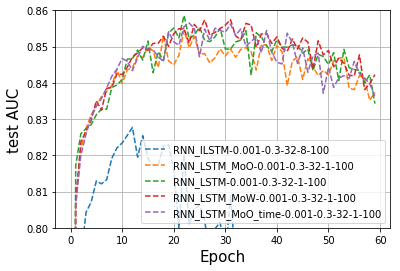

RNN_ILSTM: -1.00% (0.00) 1 runs
RNN_LSTM_MoO: -1.00% (0.00) 1 runs
RNN_LSTM: -1.00% (0.00) 1 runs
RNN_LSTM_MoW: -1.00% (0.00) 1 runs
RNN_LSTM_MoO_time: -1.00% (0.00) 1 runs


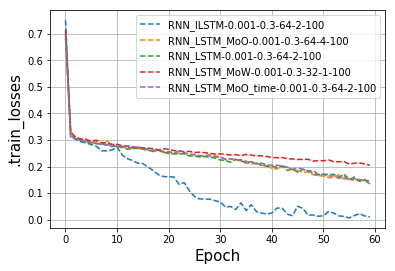

RNN_ILSTM: -1.00% (0.00) 1 runs
RNN_LSTM_MoO: -1.00% (0.00) 1 runs
RNN_LSTM: -1.00% (0.00) 1 runs
RNN_LSTM_MoW: -1.00% (0.00) 1 runs
RNN_LSTM_MoO_time: -1.00% (0.00) 1 runs


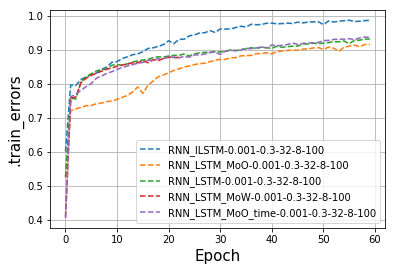

RNN_ILSTM: -1.00% (0.00) 1 runs
RNN_LSTM_MoO: -1.00% (0.00) 1 runs
RNN_LSTM: -1.00% (0.00) 1 runs
RNN_LSTM_MoW: -1.00% (0.00) 1 runs
RNN_LSTM_MoO_time: -1.00% (0.00) 1 runs


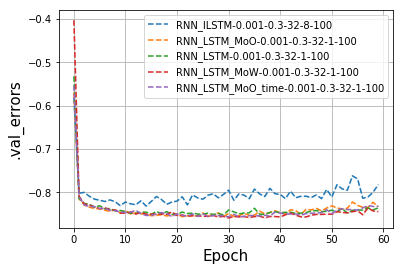

In [265]:
plot_best_test('mimic3/train_loss/*.train_losses', ylabel='AUC', ylim=[0.8, 0.86], q_low=25, q_high=75)
plot_best('mimic3/train_loss/*.train_losses')
plot_best('mimic3/train_loss/*.train_errors')
plot_best('mimic3/train_loss/*.val_errors')

RNN_LSTM test: 0.855 val: -0.858 fn:mimic3/debug/RNN_LSTM-0.001-0.3-64-2-100^-1.00^XZ7JC.train_losses


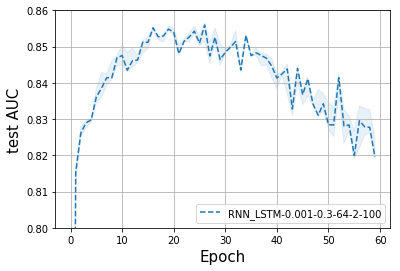

RNN_LSTM: -1.00% (0.00) 3 runs


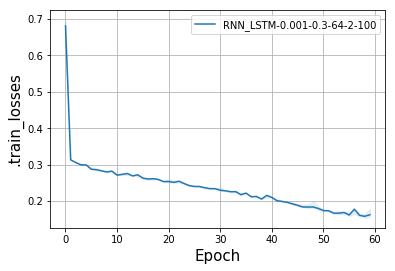

RNN_LSTM: -1.00% (0.00) 3 runs


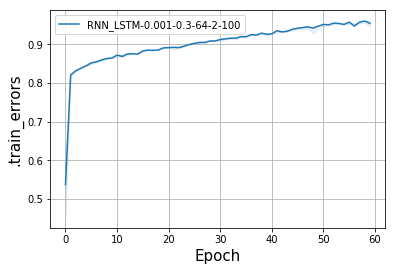

RNN_LSTM: -1.00% (0.00) 3 runs


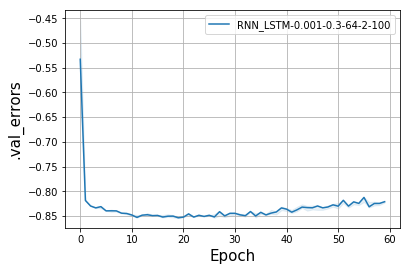

In [266]:
plot_best_test('mimic3/debug/*.train_losses', ylabel='AUC', ylim=[0.8, 0.86], q_low=25, q_high=75)
plot_best('mimic3/debug/*.train_losses')
plot_best('mimic3/debug/*.train_errors')
plot_best('mimic3/debug/*.val_errors')

RNN_ILSTM test: 0.834 mimic3/train_loss/RNN_ILSTM-0.001-0-16-2-100^-1.00^K6R2Y.train_losses
RNN_LSTM_MoO test: 0.847 mimic3/train_loss/RNN_LSTM_MoO-0.001-0-16^-1.00^X1ESU.train_losses
RNN_LSTM test: 0.842 mimic3/train_loss/RNN_LSTM-0.001^-1.00^2RYW1.train_losses
RNN_LSTM_MoW test: 0.854 mimic3/train_loss/RNN_LSTM_MoW-0.001^-1.00^YTUII.train_losses
RNN_LSTM_MoO_time test: 0.848 mimic3/train_loss/RNN_LSTM_MoO_time-0.001-0-16^-1.00^F9HOY.train_losses


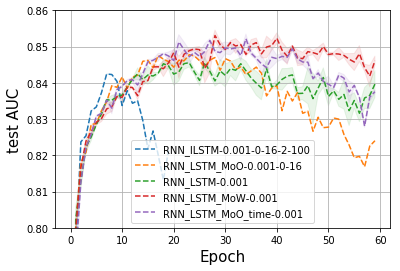

RNN_ILSTM: -1.00% (0.00) 1 runs
RNN_LSTM_MoO: -1.00% (0.00) 2 runs
RNN_LSTM: -1.00% (0.00) 2 runs
RNN_LSTM_MoW: -1.00% (0.00) 1 runs
RNN_LSTM_MoO_time: -1.00% (0.00) 1 runs


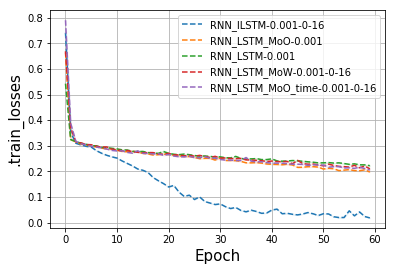

RNN_ILSTM: -1.00% (0.00) 1 runs
RNN_LSTM_MoO: -1.00% (0.00) 1 runs
RNN_LSTM: -1.00% (0.00) 1 runs
RNN_LSTM_MoW: -1.00% (0.00) 1 runs
RNN_LSTM_MoO_time: -1.00% (0.00) 1 runs


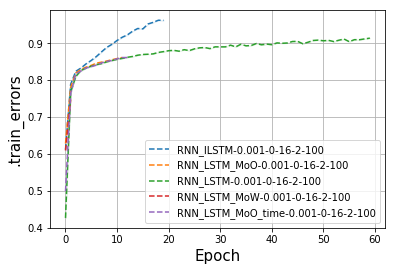

RNN_ILSTM: -1.00% (0.00) 1 runs
RNN_LSTM_MoO: -1.00% (0.00) 1 runs
RNN_LSTM: -1.00% (0.00) 2 runs
RNN_LSTM_MoW: -1.00% (0.00) 2 runs
RNN_LSTM_MoO_time: -1.00% (0.00) 2 runs


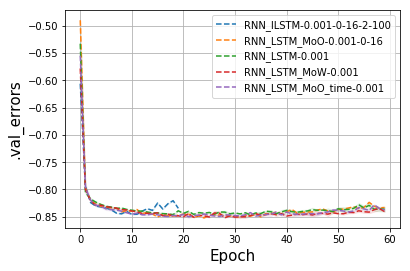

In [177]:
plot_best_test('mimic3/train_loss/*.train_losses', ylabel='AUC', ylim=[0.8, 0.86], q_low=25, q_high=75)
plot_best('mimic3/train_loss/*.train_losses')
plot_best('mimic3/train_loss/*.train_errors')
plot_best('mimic3/train_loss/*.val_errors')

# case study on MoW vs. (MoO and MoOt)

Observation: MoW better uses partial gate (not either 0 or 1)

## MoW

=> loading checkpoint 'mo_models_2layers/partial_sum4_10000/0/lstm_mow_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/partial_sum4_10000/0/lstm_mow_2_best.pth.tar' (iteration 10001)


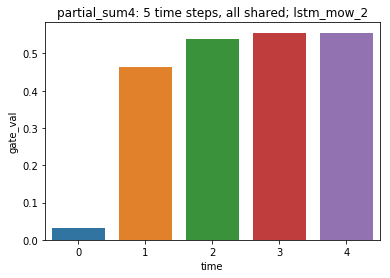

=> loading checkpoint 'mo_models_2layers/diff_task_10000/0/lstm_mow_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/diff_task_10000/0/lstm_mow_2_best.pth.tar' (iteration 7001)


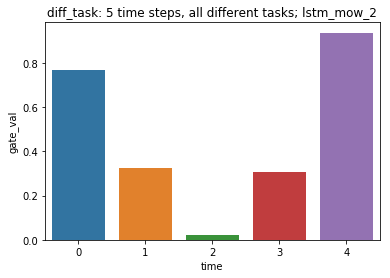

=> loading checkpoint 'mo_models_2layers/scarce_10000/0/lstm_mow_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/scarce_10000/0/lstm_mow_2_best.pth.tar' (iteration 9001)


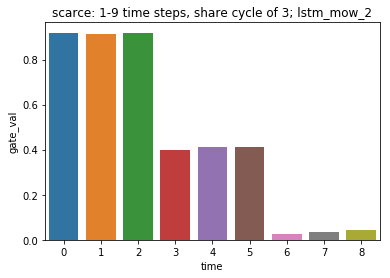

=> loading checkpoint 'mo_models_2layers/partial_sum_share_10000/0/lstm_mow_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/partial_sum_share_10000/0/lstm_mow_2_best.pth.tar' (iteration 10001)


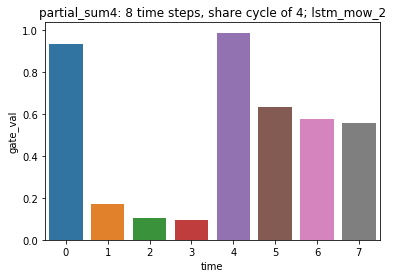

In [205]:
def MoW_case_study(exp_name, run_number=0, n_samples=10000):
    model_name = 'lstm_mow_2'

    # get the dataset
    exp = SYNTHETIC_EXPERIMENTS[exp_name]
    #savename_tr = os.path.join('sequence_data/{}_{}'.format(exp_name, n_samples), 'train.pkl')
    #data = exp.load_data(savename_tr)

    # get model
    net = MODELS['RNN_LSTM_MoW'](784, 30, 10, num_layers=2)
    net.setKT(2, exp.max_length)
    optimizer = torch.optim.Adam(net.parameters())
    criterion = nn.NLLLoss()
    trainer = TrainMORNN(net, optimizer, criterion, data)
    trainer.load_checkpoint('mo_models_2layers/{}_{}/{}/{}_best.pth.tar'.format(exp_name, 
                                                                                n_samples, 
                                                                                run_number,
                                                                                model_name))

    # plot trend
    gate = torch.nn.functional.softmax(net.coef, dim=1).detach().cpu().numpy()[:, 0]
    df = pd.DataFrame({'time': np.arange(len(gate)), 'gate_val': gate})
    sns.barplot(x='time', y='gate_val', data=df)
    plt.title("{}; {}".format(exp.describe(), model_name))
    plt.show()
    
MoW_case_study('partial_sum4', run_number=0, n_samples=10000)
MoW_case_study('diff_task', run_number=0, n_samples=10000)
MoW_case_study('scarce', run_number=0, n_samples=10000)
MoW_case_study('partial_sum_share', run_number=0, n_samples=10000)

=> loading checkpoint 'mo_models_2layers/partial_sum4_1000/0/lstm_mow_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/partial_sum4_1000/0/lstm_mow_2_best.pth.tar' (iteration 7001)


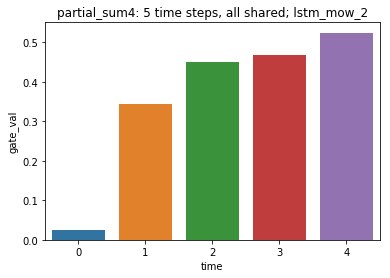

=> loading checkpoint 'mo_models_2layers/diff_task_1000/0/lstm_mow_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/diff_task_1000/0/lstm_mow_2_best.pth.tar' (iteration 10001)


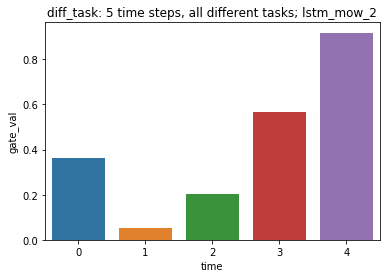

=> loading checkpoint 'mo_models_2layers/scarce_1000/0/lstm_mow_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/scarce_1000/0/lstm_mow_2_best.pth.tar' (iteration 9001)


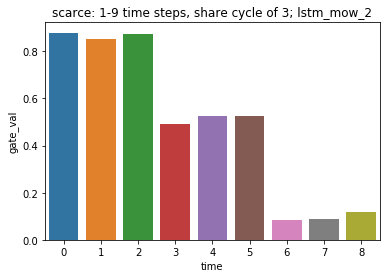

=> loading checkpoint 'mo_models_2layers/partial_sum_share_1000/0/lstm_mow_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/partial_sum_share_1000/0/lstm_mow_2_best.pth.tar' (iteration 2001)


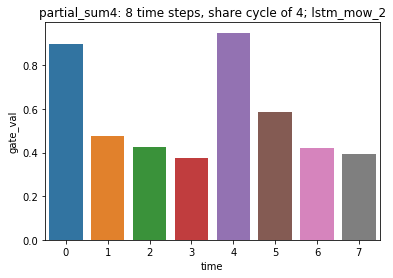

In [206]:
MoW_case_study('partial_sum4', run_number=0, n_samples=1000)
MoW_case_study('diff_task', run_number=0, n_samples=1000)
MoW_case_study('scarce', run_number=0, n_samples=1000)
MoW_case_study('partial_sum_share', run_number=0, n_samples=1000)

## MoO time

=> loading checkpoint 'mo_models_2layers/partial_sum4_10000/0/lstm_moot_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/partial_sum4_10000/0/lstm_moot_2_best.pth.tar' (iteration 9001)


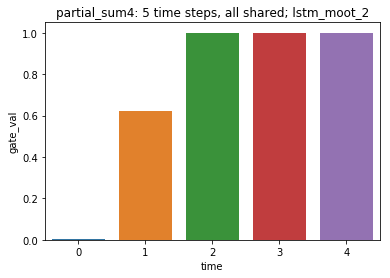

=> loading checkpoint 'mo_models_2layers/diff_task_10000/0/lstm_moot_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/diff_task_10000/0/lstm_moot_2_best.pth.tar' (iteration 7001)


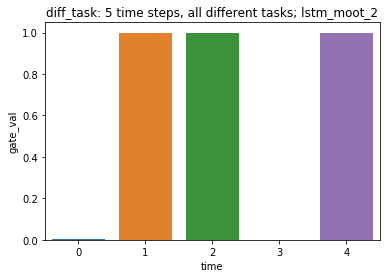

=> loading checkpoint 'mo_models_2layers/scarce_10000/0/lstm_moot_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/scarce_10000/0/lstm_moot_2_best.pth.tar' (iteration 9001)


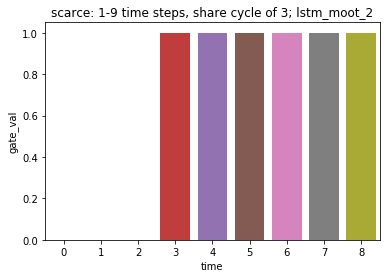

=> loading checkpoint 'mo_models_2layers/partial_sum_share_10000/0/lstm_moot_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/partial_sum_share_10000/0/lstm_moot_2_best.pth.tar' (iteration 10001)


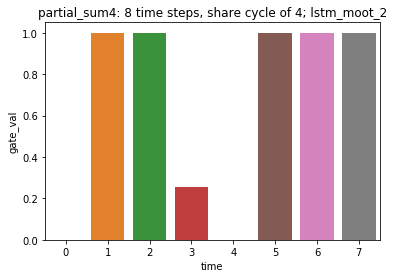

In [204]:
def MoO_time_case_study(exp_name, run_number=0, n_samples=10000):
    model_name = 'lstm_moot_2'

    # get the dataset
    exp = SYNTHETIC_EXPERIMENTS[exp_name]
    #savename_tr = os.path.join('sequence_data/{}_{}'.format(exp_name, n_samples), 'train.pkl')
    #data = exp.load_data(savename_tr)

    # get model
    net = MODELS['RNN_LSTM_MoO_time'](784, 30, 10, num_layers=2)
    net.setKT(2, exp.max_length)
    optimizer = torch.optim.Adam(net.parameters())
    criterion = nn.NLLLoss()
    trainer = TrainMORNN(net, optimizer, criterion, data)
    trainer.load_checkpoint('mo_models_2layers/{}_{}/{}/{}_best.pth.tar'.format(exp_name, 
                                                                                n_samples, 
                                                                                run_number,
                                                                                model_name))

    # plot trend
    gate = torch.nn.functional.softmax(net.coef, dim=1).detach().cpu().numpy()[:, 0]
    df = pd.DataFrame({'time': np.arange(len(gate)), 'gate_val': gate})
    sns.barplot(x='time', y='gate_val', data=df)
    plt.title("{}; {}".format(exp.describe(), model_name))
    plt.show()
    
MoO_time_case_study('partial_sum4', run_number=0, n_samples=10000)
MoO_time_case_study('diff_task', run_number=0, n_samples=10000)
MoO_time_case_study('scarce', run_number=0, n_samples=10000)
MoO_time_case_study('partial_sum_share', run_number=0, n_samples=10000)

=> loading checkpoint 'mo_models_2layers/partial_sum4_1000/0/lstm_moot_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/partial_sum4_1000/0/lstm_moot_2_best.pth.tar' (iteration 2001)


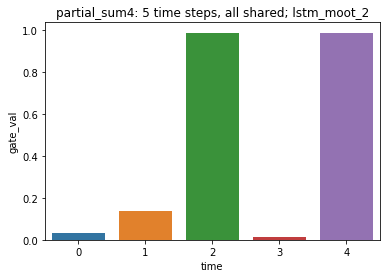

=> loading checkpoint 'mo_models_2layers/diff_task_1000/0/lstm_moot_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/diff_task_1000/0/lstm_moot_2_best.pth.tar' (iteration 2001)


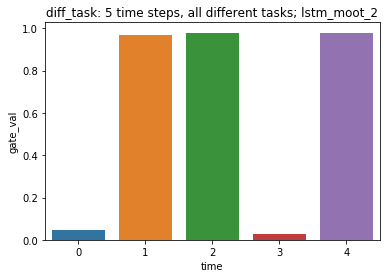

=> loading checkpoint 'mo_models_2layers/scarce_1000/0/lstm_moot_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/scarce_1000/0/lstm_moot_2_best.pth.tar' (iteration 2001)


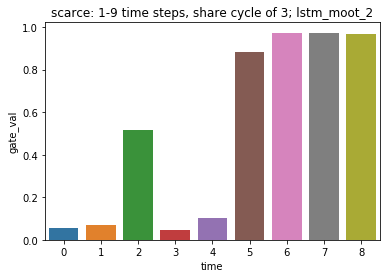

=> loading checkpoint 'mo_models_2layers/partial_sum_share_1000/0/lstm_moot_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/partial_sum_share_1000/0/lstm_moot_2_best.pth.tar' (iteration 2001)


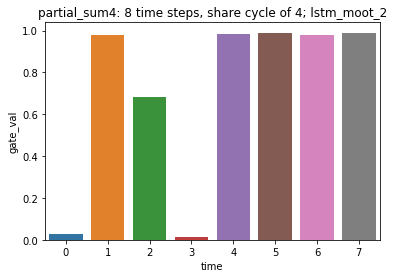

In [207]:
MoO_time_case_study('partial_sum4', run_number=0, n_samples=1000)
MoO_time_case_study('diff_task', run_number=0, n_samples=1000)
MoO_time_case_study('scarce', run_number=0, n_samples=1000)
MoO_time_case_study('partial_sum_share', run_number=0, n_samples=1000)

## MoO

==>load data sequence_data/partial_sum4_10000/test.pkl


  3%|▎         | 8/312 [00:00<00:03, 76.29it/s]

==>load data of size 10000 done
=> loading checkpoint 'mo_models_2layers/partial_sum4_10000/0/lstm_moo_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/partial_sum4_10000/0/lstm_moo_2_best.pth.tar' (iteration 10001)


100%|██████████| 312/312 [00:04<00:00, 62.51it/s]


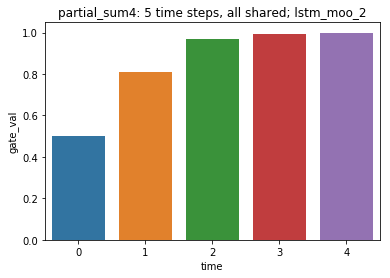

==>load data sequence_data/diff_task_10000/test.pkl


  3%|▎         | 9/312 [00:00<00:03, 80.49it/s]

==>load data of size 10000 done
=> loading checkpoint 'mo_models_2layers/diff_task_10000/0/lstm_moo_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/diff_task_10000/0/lstm_moo_2_best.pth.tar' (iteration 9001)


100%|██████████| 312/312 [00:04<00:00, 71.79it/s]


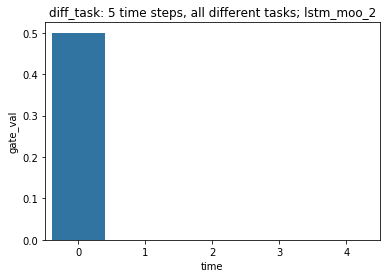

==>load data sequence_data/scarce_10000/test.pkl


  2%|▏         | 5/312 [00:00<00:06, 44.95it/s]

==>load data of size 10000 done
=> loading checkpoint 'mo_models_2layers/scarce_10000/0/lstm_moo_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/scarce_10000/0/lstm_moo_2_best.pth.tar' (iteration 8001)


100%|██████████| 312/312 [00:07<00:00, 41.69it/s]


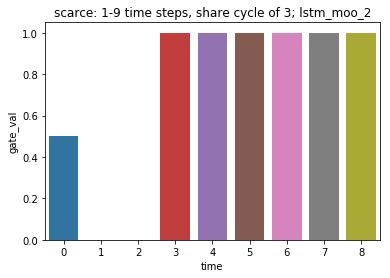

==>load data sequence_data/partial_sum_share_10000/test.pkl


  2%|▏         | 5/312 [00:00<00:06, 46.07it/s]

==>load data of size 10000 done
=> loading checkpoint 'mo_models_2layers/partial_sum_share_10000/0/lstm_moo_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/partial_sum_share_10000/0/lstm_moo_2_best.pth.tar' (iteration 10001)


100%|██████████| 312/312 [00:11<00:00, 27.78it/s]


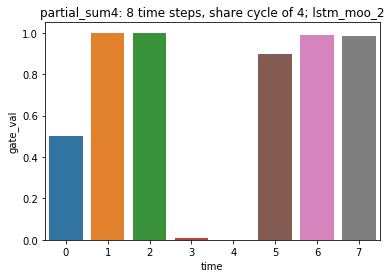

In [203]:
def MoO_case_study(exp_name, run_number=0, n_samples=10000):
    model_name = 'lstm_moo_2'
    
    # get the dataset
    exp = SYNTHETIC_EXPERIMENTS[exp_name]
    savename_tr = os.path.join('sequence_data/{}_{}'.format(exp_name, n_samples), 'test.pkl')
    data = exp.load_data(savename_tr)

    # get model
    net = MODELS['RNN_LSTM_MoO'](784, 30, 10, num_layers=2)
    net.setKT(2, exp.max_length)
    optimizer = torch.optim.Adam(net.parameters())
    criterion = nn.NLLLoss()
    trainer = TrainMORNN(net, optimizer, criterion, data)
    trainer.load_checkpoint('mo_models_2layers/{}_{}/{}/{}_best.pth.tar'.format(exp_name, 
                                                                                n_samples, 
                                                                                run_number,
                                                                                model_name))
    
    # run a few examples from the dataset; collect mean coefficient used for each time step
    net.eval()
    batch_size = 32
    niters = int(len(data) / batch_size)
    
    gate = np.zeros(exp.max_length)
    count_gate = np.zeros(exp.max_length)
    for _ in tqdm.tqdm(range(niters)):
        x, y, length = data.next_batch(batch_size)
        hidden = net.initHidden(batch_size)
        o, hidden = net(x, hidden, length)
        for t, coef in enumerate(net.last_combine_weights):
            for i, gate0_use in enumerate(coef.cpu().detach().numpy()[:,0]):
                if t < length[i]: # length masking
                    gate[t] += gate0_use
                    count_gate[t] += 1
            
    gate = gate / count_gate
    
    # plot trend
    df = pd.DataFrame({'time': np.arange(len(gate)), 'gate_val': gate})
    sns.barplot(x='time', y='gate_val', data=df)
    plt.title("{}; {}".format(exp.describe(), model_name))
    plt.show()

MoO_case_study('partial_sum4', run_number=0, n_samples=10000)
MoO_case_study('diff_task', run_number=0, n_samples=10000)
MoO_case_study('scarce', run_number=0, n_samples=10000)
MoO_case_study('partial_sum_share', run_number=0, n_samples=10000)

==>load data sequence_data/partial_sum4_1000/test.pkl


  2%|▏         | 5/312 [00:00<00:06, 48.39it/s]

==>load data of size 10000 done
=> loading checkpoint 'mo_models_2layers/partial_sum4_1000/0/lstm_moo_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/partial_sum4_1000/0/lstm_moo_2_best.pth.tar' (iteration 9001)


100%|██████████| 312/312 [00:04<00:00, 67.78it/s]


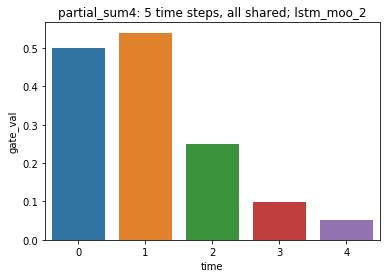

==>load data sequence_data/diff_task_1000/test.pkl


  3%|▎         | 8/312 [00:00<00:03, 78.22it/s]

==>load data of size 10000 done
=> loading checkpoint 'mo_models_2layers/diff_task_1000/0/lstm_moo_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/diff_task_1000/0/lstm_moo_2_best.pth.tar' (iteration 9001)


100%|██████████| 312/312 [00:05<00:00, 62.39it/s]


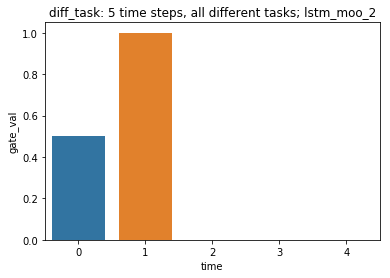

==>load data sequence_data/scarce_1000/test.pkl


  2%|▏         | 5/312 [00:00<00:07, 43.51it/s]

==>load data of size 10000 done
=> loading checkpoint 'mo_models_2layers/scarce_1000/0/lstm_moo_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/scarce_1000/0/lstm_moo_2_best.pth.tar' (iteration 2001)


100%|██████████| 312/312 [00:08<00:00, 34.83it/s]


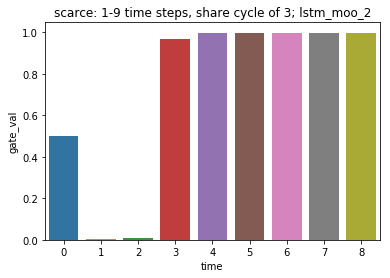

==>load data sequence_data/partial_sum_share_1000/test.pkl


  2%|▏         | 6/312 [00:00<00:06, 50.55it/s]

==>load data of size 10000 done
=> loading checkpoint 'mo_models_2layers/partial_sum_share_1000/0/lstm_moo_2_best.pth.tar'
=> loaded checkpoint 'mo_models_2layers/partial_sum_share_1000/0/lstm_moo_2_best.pth.tar' (iteration 6001)


100%|██████████| 312/312 [00:08<00:00, 38.56it/s]


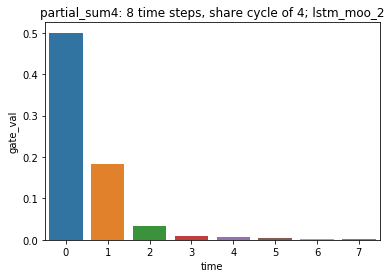

In [208]:
MoO_case_study('partial_sum4', run_number=0, n_samples=1000)
MoO_case_study('diff_task', run_number=0, n_samples=1000)
MoO_case_study('scarce', run_number=0, n_samples=1000)
MoO_case_study('partial_sum_share', run_number=0, n_samples=1000)

# all results

 14%|█▍        | 1/7 [00:00<00:01,  5.19it/s]

training size 1000


100%|██████████| 7/7 [00:01<00:00,  4.65it/s]


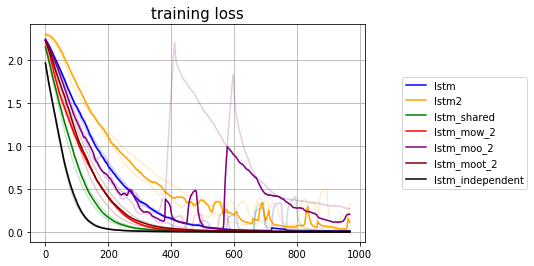

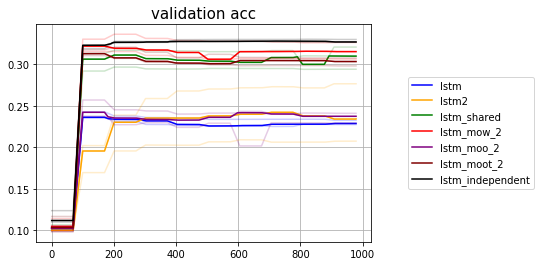

 14%|█▍        | 1/7 [00:00<00:01,  5.86it/s]

training size 10000


100%|██████████| 7/7 [00:01<00:00,  6.69it/s]


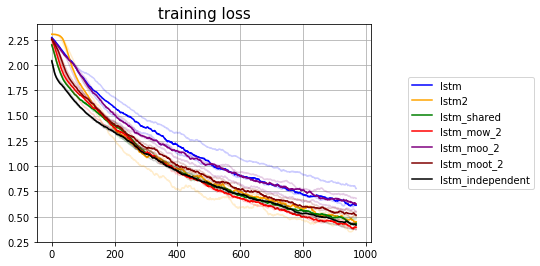

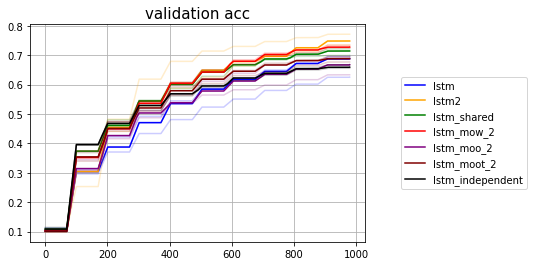

In [154]:
print('partial sum share: 8 steps, first 4 shared, last 4 shared')
for data_size in [1000,10000]:
    print('training size {}'.format(data_size))
    datadir = 'mo_models_2layers/partial_sum_share_{}/*/'.format(data_size)

    rnn_models = ['lstm.p*',
                  'lstm2.p*',
                  'lstm_shared.p*',
                  'lstm_mow_2.p*',
                  'lstm_moo_2.p*',
                  'lstm_moot_2.p*',
                  'lstm_independent.p*']
    rnn_models = [os.path.join(datadir, m) for m in rnn_models]

    plot_train_val_multiple(rnn_models) 

 14%|█▍        | 1/7 [00:00<00:01,  5.42it/s]

partial sum4: 5 steps, all shared
training size 1000


100%|██████████| 7/7 [00:01<00:00,  5.84it/s]


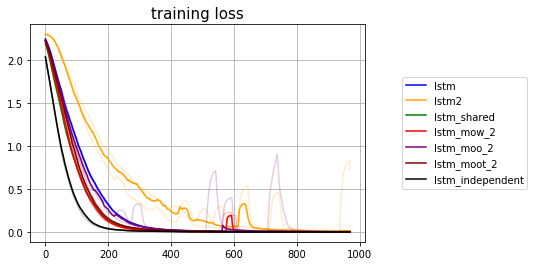

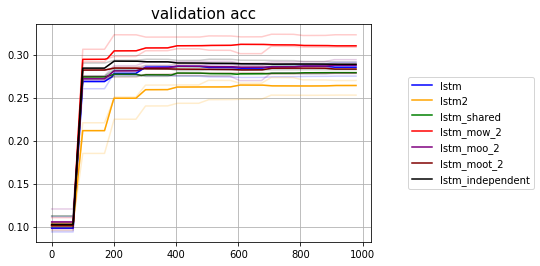

  0%|          | 0/7 [00:00<?, ?it/s]

training size 10000


100%|██████████| 7/7 [00:01<00:00,  5.27it/s]


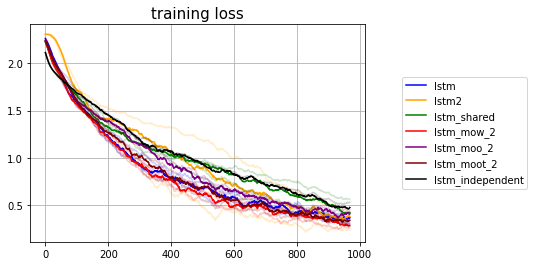

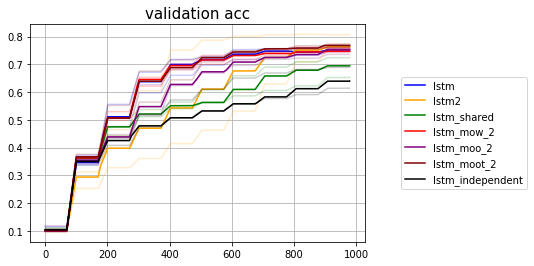

In [155]:
print('partial sum4: 5 steps, all shared')
for data_size in [1000,10000]:
    print('training size {}'.format(data_size))
    datadir = 'mo_models_2layers/partial_sum4_{}/*/'.format(data_size)

    rnn_models = ['lstm.p*',
                  'lstm2.p*',
                  'lstm_shared.p*',
                  'lstm_mow_2.p*',
                  'lstm_moo_2.p*',
                  'lstm_moot_2.p*',
                  'lstm_independent.p*']
    rnn_models = [os.path.join(datadir, m) for m in rnn_models]

    plot_train_val_multiple(rnn_models) 

 14%|█▍        | 1/7 [00:00<00:01,  5.85it/s]

diff task: 5 steps, all different
training size 1000


100%|██████████| 7/7 [00:00<00:00,  9.35it/s]


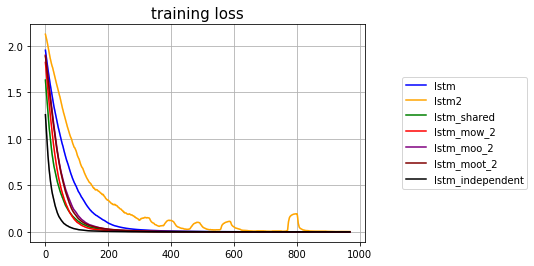

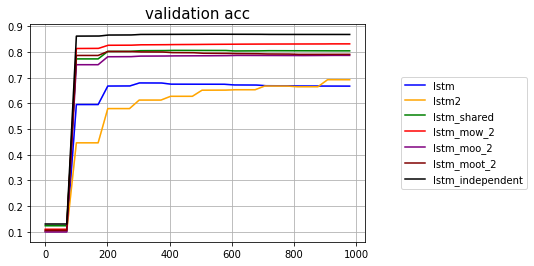

 14%|█▍        | 1/7 [00:00<00:00,  6.78it/s]

training size 10000


100%|██████████| 7/7 [00:00<00:00,  8.72it/s]


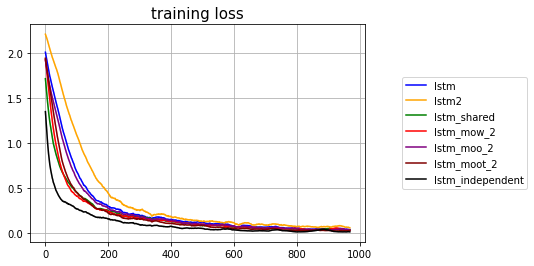

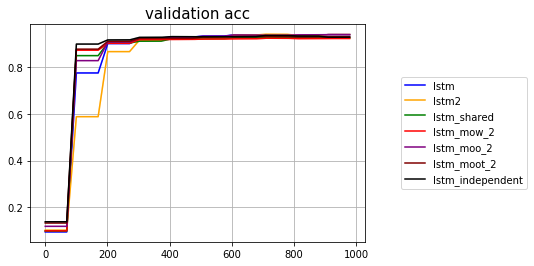

In [209]:
print('diff task: 5 steps, all different')
for data_size in [1000,10000]:
    print('training size {}'.format(data_size))
    datadir = 'mo_models_2layers/diff_task_{}/0/'.format(data_size)

    rnn_models = ['lstm.p*',
                  'lstm2.p*',
                  'lstm_shared.p*',
                  'lstm_mow_2.p*',
                  'lstm_moo_2.p*',
                  'lstm_moot_2.p*',
                  'lstm_independent.p*']
    rnn_models = [os.path.join(datadir, m) for m in rnn_models]

    plot_train_val_multiple(rnn_models) 

 14%|█▍        | 1/7 [00:00<00:00,  6.60it/s]

scarce: 1-9 steps, shared cycle of 3
training size 1000


100%|██████████| 7/7 [00:00<00:00,  7.17it/s]


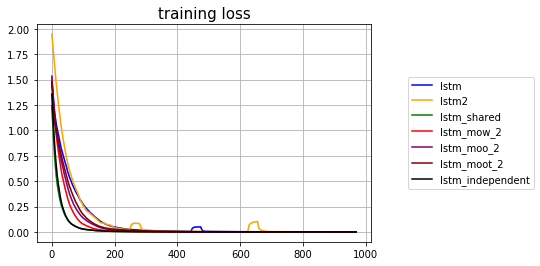

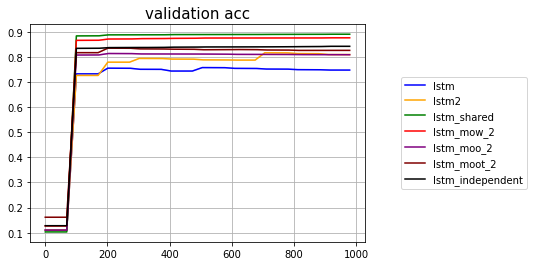

 14%|█▍        | 1/7 [00:00<00:00,  7.43it/s]

training size 10000


100%|██████████| 7/7 [00:00<00:00,  9.13it/s]


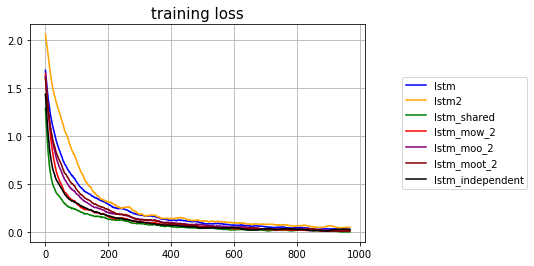

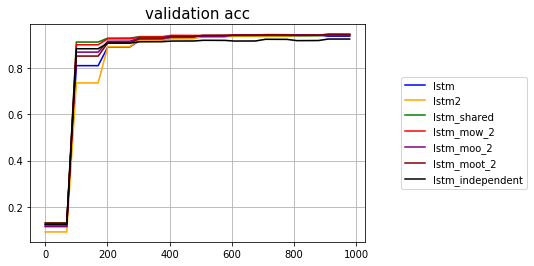

In [188]:
print('scarce: 1-9 steps, shared cycle of 3')
for data_size in [1000,10000]:
    print('training size {}'.format(data_size))
    datadir = 'mo_models_2layers/scarce_{}/*/'.format(data_size)

    rnn_models = ['lstm.p*',
                  'lstm2.p*',
                  'lstm_shared.p*',
                  'lstm_mow_2.p*',
                  'lstm_moo_2.p*',
                  'lstm_moot_2.p*',
                  'lstm_independent.p*']
    rnn_models = [os.path.join(datadir, m) for m in rnn_models]

    plot_train_val_multiple(rnn_models) 